<a href="https://colab.research.google.com/github/mohtashim0007/Machine-Learning-Projects/blob/main/MNISTCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from matplotlib import pyplot as plt
  

In [ ]:
ds = mnist.load_data()

In [ ]:
train_ds, test_ds = ds
type(train_ds)

tuple

In [ ]:
train_x, train_y = train_ds
type(train_x)

numpy.ndarray

In [ ]:
len(train_x)

60000

In [ ]:
test_x, test_y = test_ds

In [ ]:
print(train_x[0].shape)

(28, 28)


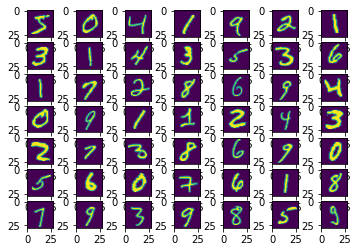

In [ ]:
def plot(x):
  c = 1
  for i in x:
    #fig = plt.figure()
    plt.subplot(7,7,c)
    c = c+1
    plt.imshow(i)
  plt.show()
x = train_x[0:49]
plot(x)

In [ ]:
#print(train_x[0])

In [ ]:
#Normalize data 
train_x = train_x[0:1000]/255
test_x = test_x[0:100]/255
train_y = train_y[0:1000]
test_y = test_y[0:100]
print(test_y)
print(type(test_y[0]))

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9]
<class 'numpy.uint8'>


In [ ]:
import tensorflow
from tensorflow.keras.utils import to_categorical
test_yc = to_categorical(test_y)
train_yc = to_categorical(train_y)
print(test_yc)

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0.

In [ ]:
print(test_yc[0][:])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [ ]:
print(test_yc.shape)
print(type(test_yc))

(100, 10)
<class 'numpy.ndarray'>


In [ ]:
def model_fun():
  model = keras.Sequential()
  model.add(keras.layers.Conv2D(filters=32  ,input_shape=(28,28,1) , kernel_size=(3,3), activation='relu'))
  model.add(keras.layers.pooling.MaxPooling2D(pool_size=(2,2)))
  model.add(keras.layers.Conv2D(16,kernel_size=(3,3), activation='relu'))
  model.add(keras.layers.pooling.MaxPooling2D(pool_size=(2,2)))
  model.add(keras.layers.Flatten())

  model.add(keras.layers.Dense(100,activation='relu', ))
  model.add(keras.layers.Dense(10, activation= keras.activations.softmax))
  model.compile(optimizer='adam' , loss= 'categorical_crossentropy', metrics=['accuracy'])
  return model

model = model_fun()
model.fit(train_x,train_yc, epochs=30)




32/32 [==============================] - 1s 22ms/step - loss: 1.3955e-04 - accuracy: 1.0000
Epoch 85/100
32/32 [==============================] - 1s 21ms/step - loss: 1.3369e-04 - accuracy: 1.0000
Epoch 86/100
32/32 [==============================] - 1s 21ms/step - loss: 1.3544e-04 - accuracy: 1.0000
Epoch 87/100
32/32 [==============================] - 1s 21ms/step - loss: 1.2577e-04 - accuracy: 1.0000
Epoch 88/100
32/32 [==============================] - 1s 22ms/step - loss: 1.2055e-04 - accuracy: 1.0000
Epoch 89/100
32/32 [==============================] - 1s 21ms/step - loss: 1.1907e-04 - accuracy: 1.0000
Epoch 90/100
32/32 [==============================] - 1s 21ms/step - loss: 1.1357e-04 - accuracy: 1.0000
Epoch 91/100
32/32 [==============================] - 1s 21ms/step - loss: 1.0959e-04 - accuracy: 1.0000
Epoch 92/100
32/32 [==============================] - 1s 22ms/step - loss: 1.0700e-04 - accuracy: 1.0000
Epoch 93/100
32/32 [==============================] - 1s 21ms/step -

In [ ]:
model.evaluate(test_x,test_yc)
model.predict(test_x)

4/4 [==============================] - 0s 7ms/step - loss: 0.0901 - accuracy: 0.9800


array([[3.96293305e-21, 2.76099738e-20, 1.84198750e-12, 5.95325789e-09,
        3.73535438e-26, 9.55360272e-18, 6.78636006e-27, 1.00000000e+00,
        2.06102309e-21, 1.61450766e-16],
       [1.67372238e-09, 6.77138123e-10, 1.00000000e+00, 2.08341433e-09,
        1.31266441e-14, 1.27559916e-11, 1.71523258e-08, 6.85872527e-23,
        2.16969342e-11, 1.11113390e-15],
       [2.47913669e-13, 1.00000000e+00, 3.99475314e-10, 5.87860793e-12,
        3.14868465e-10, 1.52145820e-13, 2.37963338e-09, 2.00261141e-08,
        2.65299616e-10, 1.47588308e-13],
       [9.99998569e-01, 5.96309980e-21, 4.42954246e-07, 1.84670038e-14,
        5.85990032e-17, 7.10223685e-11, 8.67393481e-08, 2.48456438e-08,
        7.67602681e-18, 9.18136777e-07],
       [2.36766858e-16, 2.27872107e-15, 7.50428253e-09, 1.53659635e-18,
        9.99998331e-01, 4.96090129e-15, 1.35233222e-11, 5.80067298e-13,
        3.67545172e-15, 1.66920950e-06],
       [4.19844349e-14, 1.00000000e+00, 9.67374028e-11, 1.50378286e-11,
   